In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import os
os.environ['THEANO_FLAGS'] = 'device=cpu,compiledir_format=ipynb_cpu'
sys.path.append('..')
from helpers import salt_and_pepper
from tools.brushstroke.common import load_model, seq_to_video, embed_video, disp_grid
from tools.brushstroke.fractal import gen, MODELS
from IPython.display import Image
import numpy as np
from skimage.io import imsave

MODELS = {
    8:   ['b'],
    16:  ['b3', 'b2', 'a5', 'a4', 'a3', 'a2', 'a'],
    32:  ['a6'],
    64:  ['c'],
    128: ['d']
}
MODELS = {
    k: map(lambda name:'../training/fractal/{}/model.pkl'.format(name), v)
    for k, v in MODELS.items()
}
print(MODELS)

Couldn't import dot_parser, loading of dot files will not be possible.
{8: ['../training/fractal/b/model.pkl'], 16: ['../training/fractal/b3/model.pkl', '../training/fractal/b2/model.pkl', '../training/fractal/a5/model.pkl', '../training/fractal/a4/model.pkl', '../training/fractal/a3/model.pkl', '../training/fractal/a2/model.pkl', '../training/fractal/a/model.pkl'], 128: ['../training/fractal/d/model.pkl'], 64: ['../training/fractal/c/model.pkl'], 32: ['../training/fractal/a6/model.pkl']}


/home/mcherti/work/code/external/scikit-learn/sklearn/cross_validation.py:43: DeprecationWarning: This module has been deprecated in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/mcherti/miniconda/envs/databoard-env/lib/python2.7/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [97]:
rng = np.random
#model_filename = '../jobs/results/6471bc3ec1596e46ee3e89537b923782/model.pkl'
model_filename = '../training/fractal/b3/model.pkl'
neuralnets = [
    {
        'model_filename': model_filename,
        'nb_iter':  1,
        'thresh': 'moving',
        'when': [(0,0.5)],
        'whitepx_ratio': 0.1,
        'scale': 'random',
        'scales': [16],
        'scale_probas': [1],
        'learning_rate': [1],
        'noise': None,
        'noise_type': None
    },
        {
        'model_filename': model_filename,
        'nb_iter':  1,
        'thresh': None,
        'when': [(0.5,8)],
        'whitepx_ratio': 0.2,
        'scale': 'random',
        'scales': [2],
        'scale_probas': [1],
        'learning_rate': [0.1],
        'noise': None,
        'noise_type': None
    },
    
    {
        'model_filename': model_filename,
        'nb_iter':  1,
        'thresh': None,
        'when': [(0.8,1)],
        'whitepx_ratio': 0.2,
        'scale': 'random',
        'scales': [1],
        'scale_probas': [1],
        'learning_rate': [1],
        'noise': None,
        'noise_type': None
    },
]
neuralnets = neuralnets[0:1]
trial_conf = {
    'neuralnets': neuralnets,
    'nb_iter': 5000,
    'w': 2**8,
    'h': 2**8,
    'init': 'random',
    'seed': np.random.randint(1,100),
    'nb_snapshots': 100
}


101


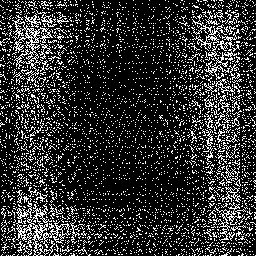

In [99]:
snaps = gen(trial_conf)
img = snaps[-1]
img -= img.min()
img /= img.max()
imsave('out.png',snaps[-1])
Image('out.png')

In [100]:
print(snaps.shape)
seq_to_video(snaps[None, :, None, :, :], filename='out.mp4')
embed_video('out.mp4')

(50, 256, 256)


/home/mcherti/miniconda/envs/databoard-env/lib/python2.7/site-packages/skimage/io/_io.py:132: UserWarning: /tmp/img_to_videoJB8f5B/img00000000.png is a low contrast image
  warn('%s is a low contrast image' % fname)


ffmpeg -framerate 8 -i img%08d.png -c:v libx264 -r 8 -pix_fmt yuv420p /home/mcherti/work/code/feature_generation/ipynb/out.mp4
